In [1]:
import pandas as pd

In [2]:
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
routes = pd.read_csv('routes.csv')

In [3]:
print(routes.iloc[:1])

  airline airline_id source source_id dest dest_id codeshare  stops equipment
0      2B        410    AER      2965  KZN    2990       NaN      0       CR2


In [4]:
print(airports.iloc[:1])

   id    name    city           country code  icao  latitude   longitude  \
0   1  Goroka  Goroka  Papua New Guinea  GKA  AYGA -6.081689  145.391881   

   altitude  offset dst              timezone  
0      5282    10.0   U  Pacific/Port_Moresby  


In [5]:
print(airlines.iloc[:1])

   id            name alias iata icao callsign country active
0   1  Private flight    \N    -  NaN      NaN     NaN      Y


In [6]:
from mpl_toolkits.basemap import Basemap

In [7]:
import matplotlib.pyplot as plt

## Converting lat long to Cartesian coordinates

In [9]:
m = Basemap(projection = 'merc', llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180, urcrnrlon=180)

C:\Users\pragg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.


In [10]:
m


In [12]:
longitudes=airports['longitude'].tolist()
latitudes=airports['latitude'].tolist()

In [13]:
x,y=m(longitudes,latitudes)

In [14]:
print(x,y)

[36181909.30105094, 36226033.53986971, 36060037.49493744, 36330283.404696316, 36385192.32317709, 35990354.44709509, 14963941.458273921, 14268741.541486904, 14378684.250292266, 12375638.020887403, 18005485.43317323, 18413716.731862824, 18321888.33524768, 18077397.938244995, 17442553.042491462, 17501455.413687292, 17350292.20901023, 17575400.005086605, 17911640.962292437, 17760170.414982848, 10618060.258599434, 9225560.732214285, 12954264.67851546, 13778929.009821879, 6029820.04527255, 10028881.874571005, 12431092.795006035, 12120642.599331541, 9331720.924981104, 6085602.844270321, 8900933.52365312, 8324233.650806665, 6241349.72405515, 6934946.3219498545, 12737465.474640507, 12639490.447764657, 7211667.109238329, 7622933.694411267, 6456097.827279047, 12396375.19777225, 10745934.475221692, 4544781.58702558, 4554480.226350438, 6614828.621515303, 13633449.197559252, 5556160.792994859, 8889752.211874548, 6651343.795086775, 7385594.462163575, 9554882.921952376, 8565804.515190138, 7064766.3376

## Plot on map 

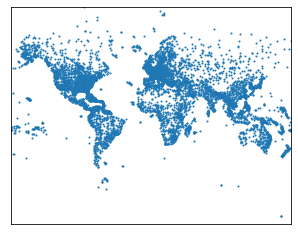

In [17]:
m.scatter(x,y,s=1)
plt.show()

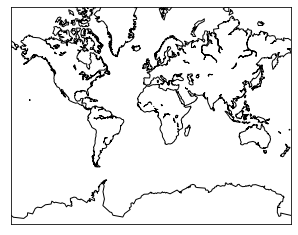

In [20]:
m.drawcoastlines()

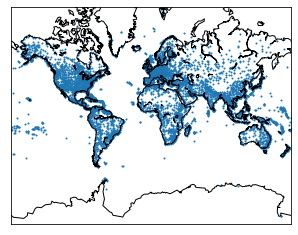

In [21]:
m.scatter(x,y,s=1)
m.drawcoastlines()
plt.show()

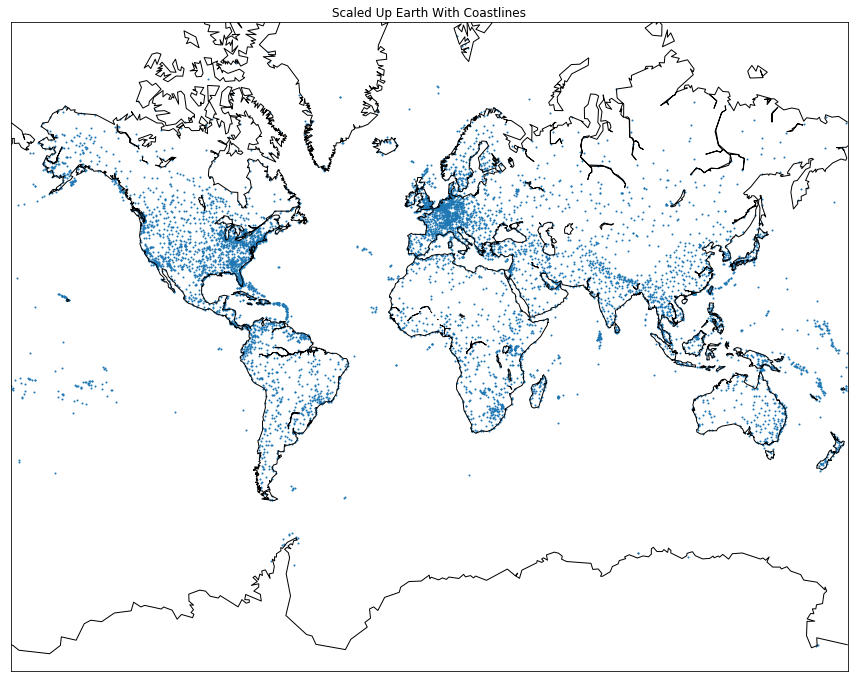

In [25]:
fig, ax =plt.subplots(figsize=(15,20))
ax.set_title("Scaled Up Earth With Coastlines")
m.scatter(x,y,s=1)
m.drawcoastlines()
plt.show()

In [26]:
geo_routes=pd.read_csv('geo_routes.csv')
geo_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB


In [27]:
geo_routes.head()

,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
0,2B,AER,KZN,CR2,39.956589,49.278728,43.449928,55.606186
1,2B,ASF,KZN,CR2,48.006278,49.278728,46.283333,55.606186
2,2B,ASF,MRV,CR2,48.006278,43.081889,46.283333,44.225072
3,2B,CEK,KZN,CR2,61.503333,49.278728,55.305836,55.606186
4,2B,CEK,OVB,CR2,61.503333,82.650656,55.305836,55.012622


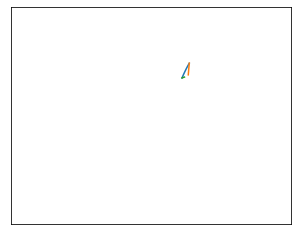

In [30]:
m.drawgreatcircle(39.956589, 43.449928, 49.278728, 55.606186)
m.drawgreatcircle(48.006278, 46.283333, 49.278728, 55.606186)
m.drawgreatcircle(39.956589, 43.449928, 43.081889 , 44.225072)
plt.show()

C:\Users\pragg\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


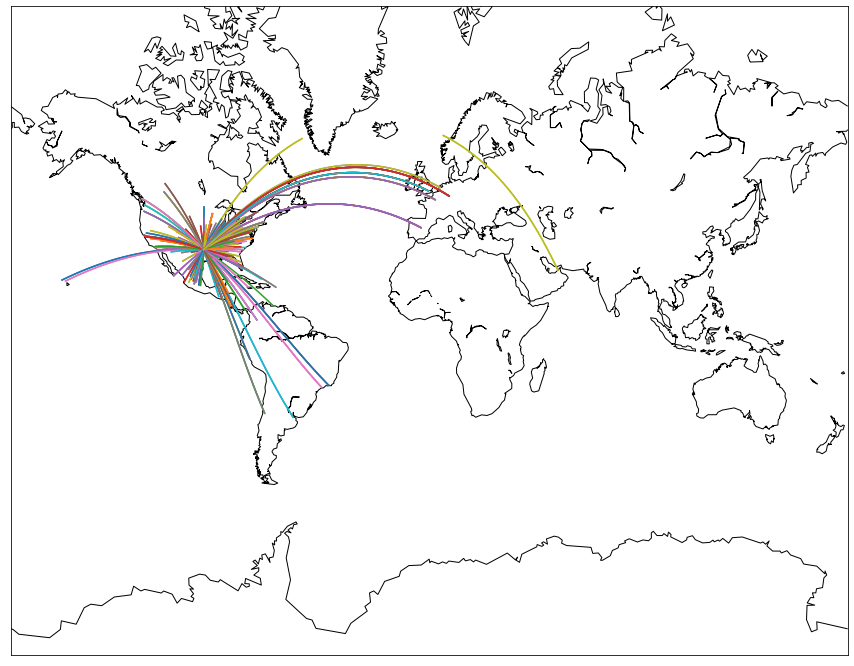

In [63]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()



def create_great_circles(df):
    for index,row in df.iterrows():
        if (abs(row['start_lat']-row['end_lat'])<180 and abs(row['start_lon']-row['end_lon'])<180):
            m.drawgreatcircle(row['start_lon'],row['start_lat'],row['end_lon'],row['end_lat'])
    plt.show()

dfw=geo_routes[geo_routes['source']=='DFW']
create_great_circles(dfw)


In [51]:
dfw.head()

,airline,source,dest,equipment,start_lon,end_lon,start_lat,end_lat
1057,4M,DFW,EZE,777,-97.037997,-58.535833,32.896828,-34.822222
5134,AA,DFW,ABI,ERD CRJ ER4,-97.037997,-99.681897,32.896828,32.411319
5135,AA,DFW,ABQ,M80 M83,-97.037997,-106.609194,32.896828,35.040222
5136,AA,DFW,ACT,ER4 ERD,-97.037997,-97.230519,32.896828,31.611289
5137,AA,DFW,AEX,CRJ ER4 ERD,-97.037997,-92.549833,32.896828,31.327400
